In [85]:
import numpy as np

In [113]:
class Perceptron(object):
    #Perceptron Classifier
    #Parameters
    #----------
    #eta : float
    # Learning rate (between 0.0 and 1.0)
    #n_iter: int
    #Pasos sobre conjunto de entrenamiento
    #Atributos
    #-----------
    #w_ :arreglo 1D
    #errors_ : lista
    # numero de clasificaciones erroneas en cada lapso de tiempo
    def __init__(self, eta=0.01, n_iter=100):
        self.eta=eta
        self.n_iter= n_iter
    def fit(self, X, y):
        #Ajuste de entrenamiento de datos
        
        #Parametros
        #-----------
        #X:{arreglo}, shape={n_samples, n_ajustes}
        #vectores de entrenamiento, donde n_samples de muestras n_features es el número de características
        #y:{arreglo}, shape={n_samples}
        #Valores objetivo
        #Returns
        #-------
        #self:object
        
        self.w_=np.zeros(1+X.shape[1])
        self.errors_ =[]
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta*(target-self.predict(xi))
                self.w_[1:]+= update*xi
                self.w_[0] +=update
                errors += int(update !=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
    #calcula entrada net
        return np.dot(X,self.w_[1:]+self.w_[0])
    
    def predict (self,X):
        #regresa la etiqueta class despues de un paso unitario
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    ###########################################
    

In [114]:
import pandas as pd

In [115]:
#df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
df=pd.read_csv("/home/julio/Escritorio/iris.data",header=None)

In [116]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [118]:
import matplotlib.pyplot as plt

In [119]:
y=df.iloc[0:100,4].values
print (y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [120]:
y=np.where(y=="Iris-setosa",-1,1)
print (y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [121]:
X=df.iloc[0:100,[0,2]].values
#print(X)
#print(np.zeros(1+X.shape[1]))


In [122]:
a=[[1,2,3,.3],[1,3,4,2]]
a_array=np.array(a)
print(a_array.shape[1])
b = np.array([[0, 1, 2], [3, 4, 5]]) # arreglo 2 x 3
b.shape

4


(2, 3)

In [123]:
plt.scatter(X[:50,0],X[:50,1],color="red",marker="o", label="setosa")

In [124]:
plt.scatter(X[50:100,0],X[50:100,1],color="blue",marker="x", label="versicolor")

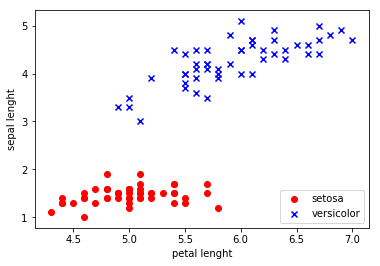

In [125]:
plt.xlabel("petal lenght")
plt.ylabel("sepal lenght")
plt.legend(loc="lower right")
plt.show()

In [132]:
ppn= Perceptron(eta=0.1,n_iter=100)

In [133]:
ppn.fit(X,y)

In [134]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

In [135]:
plt.xlabel('Epochs')

In [136]:
plt.ylabel('Number of misclassifications')

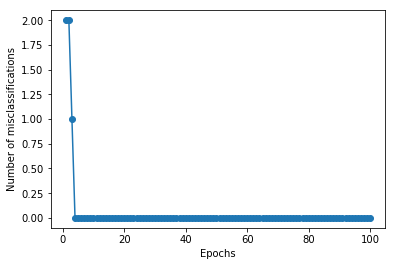

In [137]:
plt.show()

In [138]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers = ('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max = X[:,0].min()-1, X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min()-1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min,x2_max, resolution))
    
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha = 0.4,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],edgecolors="black" ,alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    

In [106]:
plot_decision_regions(X,y, classifier=ppn)

In [107]:
plt.xlabel("sepal lenght [cm]")

In [108]:
plt.ylabel('petal lenght [cm]')

In [109]:
plt.legend(loc='upper left')

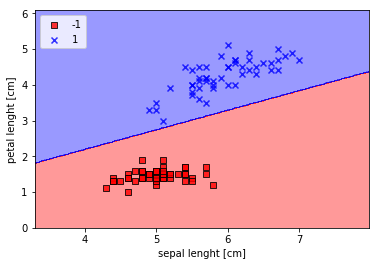

In [110]:
plt.show()

In [56]:
print("theta", ppn.predict(0))

theta [1 1]
